In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [47]:
df=pd.read_csv('Delhi metro.csv')

In [48]:
df.head()


,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1.0,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2.0,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3.0,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4.0,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5.0,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807


In [49]:
df.isna().sum()


ID (Station ID)                 53
Station Names                    3
Dist. From First Station(km)    53
Metro Line                      53
Opened(Year)                    53
Layout                          53
Latitude                        52
Longitude                       52
dtype: int64

In [50]:
df=df.dropna()

In [51]:
new_df= df.drop(['Dist. From First Station(km)','Metro Line','Opened(Year)','Layout'],axis=1,inplace=True)

In [52]:
df.shape


(284, 4)

In [53]:

df

,ID (Station ID),Station Names,Latitude,Longitude
0,1.0,Shaheed Sthal(First Station),28.670611,77.415582
1,2.0,Hindon River,28.878965,77.415483
2,3.0,Arthala,28.676999,77.391892
3,4.0,Mohan Nagar,28.606319,77.106082
4,5.0,Shyam park,28.698807,28.698807
...,...,...,...,...
331,2.0,Shivaji Stadium,28.629010,77.211900
332,3.0,Dhaula Kuan,28.591780,77.161550
334,4.0,Delhi Aerocity,28.548810,77.120920
335,5.0,IGI Airport,28.556930,77.086690


In [54]:
df.drop('ID (Station ID)',axis=1,inplace=True)	

In [55]:
df

,Station Names,Latitude,Longitude
0,Shaheed Sthal(First Station),28.670611,77.415582
1,Hindon River,28.878965,77.415483
2,Arthala,28.676999,77.391892
3,Mohan Nagar,28.606319,77.106082
4,Shyam park,28.698807,28.698807
...,...,...,...
331,Shivaji Stadium,28.629010,77.211900
332,Dhaula Kuan,28.591780,77.161550
334,Delhi Aerocity,28.548810,77.120920
335,IGI Airport,28.556930,77.086690


In [56]:
df

,Station Names,Latitude,Longitude
0,Shaheed Sthal(First Station),28.670611,77.415582
1,Hindon River,28.878965,77.415483
2,Arthala,28.676999,77.391892
3,Mohan Nagar,28.606319,77.106082
4,Shyam park,28.698807,28.698807
...,...,...,...
331,Shivaji Stadium,28.629010,77.211900
332,Dhaula Kuan,28.591780,77.161550
334,Delhi Aerocity,28.548810,77.120920
335,IGI Airport,28.556930,77.086690


In [57]:
df.to_csv('data_proc.csv')

In [58]:
import random

In [59]:
keys=list(df.index)

In [60]:
no=random.choice(keys)

In [61]:
cur_loc = df.loc[no]

In [62]:
cur_loc

Station Names    Mandawali - West Vinod Nagar
Latitude                            28.624971
Longitude                           77.304491
Name: 287, dtype: object

In [63]:
new_df=df

In [64]:
!pip install --upgrade pip

  Using cached pip-24.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\swaraj\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
!pip install pygeodesic


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from geopy.distance import geodesic

ModuleNotFoundError: No module named 'geopy'

In [ ]:
!pip install geopy

In [ ]:
from geopy.distance import geodesic

In [ ]:
def distance(data):
    ans=[]
    for x in df:
        coords1 = (x.Longitude, x.Longitude)
        coords2 = (data['Longitude'], data['Longitude'])
        dist = geodesic(coords1, coords2).km
        ans+=dist
        print(dist)

In [ ]:
distance(cur_loc)

# Ml Project to get nearby 5 distances and check accuracy and rsm

In [284]:
# Read your actual data from CSV into a DataFrame
df = pd.read_csv('Delhi metro.csv')
df=df.dropna()
df.isna().sum()

ID (Station ID)                 0
Station Names                   0
Dist. From First Station(km)    0
Metro Line                      0
Opened(Year)                    0
Layout                          0
Latitude                        0
Longitude                       0
dtype: int64

In [288]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance_km = 6371 * c  # Radius of the Earth in km
    return distance_km

def generate_random_coordinate(center, radius):
    angle = np.random.uniform(0, 2 * np.pi)
    r = radius * np.sqrt(np.random.uniform(0, 1))
    dx = r * np.cos(angle)
    dy = r * np.sin(angle)
    random_lat = center[0] + (dy / 110.574)  # Approx. km per degree latitude
    random_lon = center[1] + (dx / (111.320 * np.cos(np.radians(center[0]))))  # Approx. km per degree longitude
    return np.array([random_lat, random_lon])

# Example user coordinates (center)
user_coordinates = [28.6139,77.2090]  # Example center coordinates (New York City)

# Generate one random coordinate within a 10 km radius around user_coordinates
radius_km = 10
random_coordinate = generate_random_coordinate(user_coordinates, radius_km)

# Load your DataFrame 'df' with 'Latitude' and 'Longitude' columns

# Calculate distances to points in DataFrame
distances = []
for index, row in df.iterrows():
    point_lat = row['Latitude']
    point_lon = row['Longitude']
    distance_km = haversine_distance(random_coordinate[0], random_coordinate[1], point_lat, point_lon)
    distances.append(distance_km)
df['Distance_km'] = distances
print( df)
# Now distances list contains the distances from the random_coordinate to each point in your DataFrame


     ID (Station ID)                 Station Names  \
0                1.0  Shaheed Sthal(First Station)   
1                2.0                  Hindon River   
2                3.0                       Arthala   
3                4.0                   Mohan Nagar   
4                5.0                    Shyam park   
..               ...                           ...   
331              2.0               Shivaji Stadium   
332              3.0                   Dhaula Kuan   
334              4.0                Delhi Aerocity   
335              5.0                   IGI Airport   
336              6.0              Dwarka Sector 21   

     Dist. From First Station(km)   Metro Line Opened(Year)       Layout  \
0                             0.0     Red line   08-03-2019     Elevated   
1                             1.0     Red line   08-03-2019     Elevated   
2                             2.5     Red line   08-03-2019     Elevated   
3                             3.2     Red line 

In [302]:

label=df.iloc[:,-1]
features=df.iloc[:,6:8]
features.describe

<bound method NDFrame.describe of       Latitude  Longitude
0    28.670611  77.415582
1    28.878965  77.415483
2    28.676999  77.391892
3    28.606319  77.106082
4    28.698807  77.154000
..         ...        ...
331  28.629010  77.211900
332  28.591780  77.161550
334  28.548810  77.120920
335  28.556930  77.086690
336  28.552260  77.058280

[284 rows x 2 columns]>

In [303]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have defined x_train, x_test, y_train, y_test and knn_regressor as in your example

# Fit the model
knn_regressor.fit(x_train, y_train)

# Predict distances on the test data
y_pred = knn_regressor.predict(x_test)

# Get the top 5 predicted distances
top_5_distances_idx = np.argsort(y_pred)[::-1][:5]  # Indices of top 5 distances (descending order)
top_5_distances = y_pred[top_5_distances_idx]  # Top 5 distances

# Print top 5 distances
print("Top 5 Predicted Distances:")
for i, distance in enumerate(top_5_distances):
    print(f"Rank {i+1}: {distance}")

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


Top 5 Predicted Distances:
Rank 1: 29.92165968229711
Rank 2: 19.607775102843178
Rank 3: 18.19696176756334
Rank 4: 17.96051475037175
Rank 5: 16.80271052991146
R^2 Score: 0.9228692717030454
Mean Squared Error (MSE): 4.416128567830394


In [296]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 487.6 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


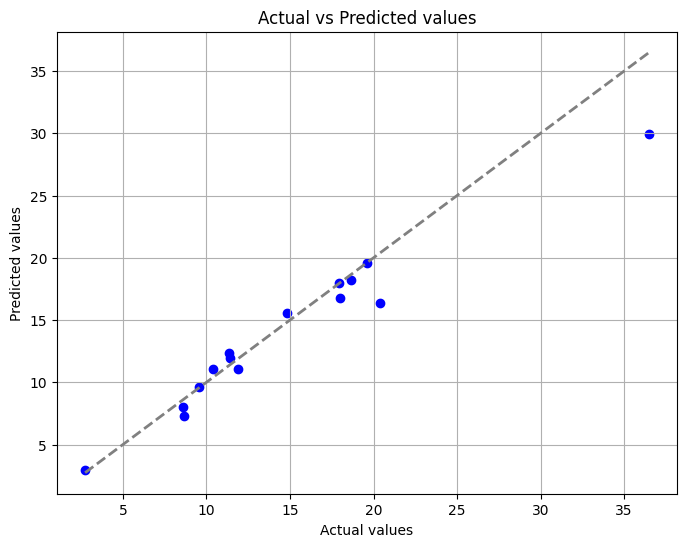

In [298]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='gray', linewidth=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.grid(True)
plt.show()

# to check using cross validation as data is small

In [304]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Example dataset with features (X) and target (y)

# Initialize KNeighborsRegressor with desired parameters
model = KNeighborsRegressor(n_neighbors=5)

# Define the number of folds for cross-validation
k_folds = 5  # Example: 5-fold cross-validation

# Initialize cross-validation strategy
kf = KFold(n_splits=k_folds, shuffle=True, random_state=10)

# Perform cross-validation and calculate mean squared error (MSE) for each fold
mse_scores = cross_val_score(model, features, label, scoring='neg_mean_squared_error', cv=kf)

# Convert negative MSE scores to positive and compute RMSE (Root Mean Squared Error)
rmse_scores = np.sqrt(-mse_scores)

# Calculate mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)
print(f'Mean RMSE across {k_folds}-fold cross-validation: {mean_rmse}')


Mean RMSE across 5-fold cross-validation: 2.88082748633789


# function to be incorporated in our model in leaflet

In [267]:


ans=df.iloc[:,-2:]
arr=np.array(ans)
arr

array([[77.4155822 , 21.12316519],
       [77.4154832 , 35.69222007],
       [77.3918919 , 19.17711265],
       [77.10608185, 10.08195151],
       [77.154     , 10.85991554],
       [77.3581426 , 16.18666553],
       [77.2094999 ,  2.99823448],
       [77.2120573 ,  9.2473986 ],
       [77.32142   , 12.95809717],
       [77.31239   , 12.21291532],
       [77.30095   , 11.28452978],
       [77.28962   , 10.28313595],
       [77.27756   ,  9.28516413],
       [77.2667    ,  8.39446529],
       [77.24994   ,  7.22152481],
       [77.22817   ,  6.24676112],
       [77.21653   ,  5.96214143],
       [77.20727   ,  5.83572854],
       [77.19882   ,  5.94578167],
       [77.18169   ,  6.78248917],
       [77.16459   ,  8.77691416],
       [77.1616    ,  9.54025865],
       [77.15226   , 10.66819762],
       [77.14024   , 11.51836791],
       [77.13223   , 12.43554946],
       [77.12591   , 13.20154338],
       [77.11467   , 14.51408061],
       [77.10713   , 15.48757661],
       [77.1382654 ,

In [268]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# User coordinates (latitude, longitude)
user_coordinates = np.array([[28.60383, 77.13497891]])


# Function to generate one random coordinate within a given radius
def generate_random_coordinate(center, radius):
    angle = np.random.uniform(0, 2 * np.pi)
    r = radius * np.sqrt(np.random.uniform(0, 1))
    dx = r * np.cos(angle)
    dy = r * np.sin(angle)
    random_lat = center[0] + (dy / 110.574)  # Approx. km per degree latitude
    random_lon = center[1] + (dx / (111.320 * np.cos(np.radians(center[0]))))  # Approx. km per degree longitude
    return np.array([random_lat, random_lon])

# Generate one random coordinate within a 10 km radius around user_coordinates
radius_km = 10
random_coordinate = generate_random_coordinate(user_coordinates[0], radius_km).reshape(1, -1)

print("Random coordinate around the user location:")
print(random_coordinate)

# Initialize the KNN model with the number of neighbors
k = 5
knn = NearestNeighbors(n_neighbors=k, algorithm='ball_tree')

# Fit the KNN model with the charging station coordinates
knn.fit(arr)

# Find the 5-nearest charging stations to the random coordinate
distances, indices = knn.kneighbors(random_coordinate)

# Retrieve the coordinates of the nearest charging stations
nearest_charging_stations = arr[indices]

print("\nNearest charging stations to the generated random coordinate:")
print(nearest_charging_stations)


Random coordinate around the user location:
[[28.64049024 77.04160134]]

Nearest charging stations to the generated random coordinate:
[[[77.52850191 83.17247216]
  [76.9155232  36.63147559]
  [76.9155232  36.63147559]
  [76.9155232  36.63147559]
  [77.55447875 37.07380576]]]


In [269]:
data=(nearest_charging_stations[0])
new_df=pd.DataFrame(data,columns=["Latitude","Longitude"])
print(new_df)
   

    Latitude  Longitude
0  77.528502  83.172472
1  76.915523  36.631476
2  76.915523  36.631476
3  76.915523  36.631476
4  77.554479  37.073806


In [271]:
df_dict_list = result_df.to_dict(orient='list')
print("Dictionary of lists:", df_dict_list)




Dictionary of lists: {'ID (Station ID)': [], 'Station Names': [], 'Dist. From First Station(km)': [], 'Metro Line': [], 'Opened(Year)': [], 'Layout': [], 'Latitude': [], 'Longitude': [], 'Distance_km': []}


In [196]:
# Given dictionary of lists


# Create a dictionary where keys are station names and values are (latitude, longitude) tuples
station_dict = {name: (lat, lon) for name, lat, lon in zip(df_dict_list['Station Names'], df_dict_list['Latitude'], df_dict_list['Longitude'])}

print("Dictionary with station names as keys and coordinates as values:")
print(station_dict)


Dictionary with station names as keys and coordinates as values:
{'Karol Bagh': (28.644, 77.18855), 'Jhandewalan': (28.64427, 77.19988), 'Rajendra Place': (28.6425, 77.17815), 'R K Ashram Marg': (28.63923, 77.2084), 'Raj Bagh': (28.6408602, 77.2094999)}
